# Module 3 Project - London Air Quality analysis

1. [Introduction and Motivation](#intro)
2. [Hypotheses](#hyp)
3. [Data extraction and cleaning](#Cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Statistical Analysis](#stats)
6. [Discussion](#disc)



<a id='intro'></a>

### 1. Introduction and motivation

    This project analyses air quality data from Central London in order to determine if and to what extent the introduction of the Ultra-Low-Emissions-Zone (ULEZ) had on the air and how does its impact compare to that of its predecessor, the Low-Emissions-Zone (LEZ). We looked specifically at two pollutants, nitrogen dioxide (NO2) and PM10 (particulates of solid matter with a diameter less than 10 micrometers). 
    
    No2 is one of the most most common and hazardous oxides, the limit for average levels of nitrogen dioxide (NO2) is no more than 40 µg/m3. Both UK and EU objectives also state the NO2 levels must not exceed 200 µg/m3 more than 18 times in a year. NO2 is a gas in the air which is largely produced by the burning of fuel. Emissions from cars – particularly diesel-run engines – are generally recognised as the main sources of NO2. Breathing air with a high concentration of NO2 can cause irritation in the respiratory system. It can aggravate pre-existing conditions such as asthma and cause sufferers to be admitted to hospital.
    PM10 is particulate matter 10 micrometers or less in diameter, originating from road traffic include carbon emissions from engines, small bits of metal and rubber from engine wear and braking as well as dust from road surfaces. Others include material from building and industry as well as wind-blown dust, sea salt, pollens and soil particles. People often associate particles with smoky engines, but the majority of particles that can penetrate the airway are too small to see, and thus can be present in air that seems clean. 
    
    The London Low Emission Zone (LEZ) is a traffic pollution charge scheme with the aim of reducing the exhaust gas emissions of diesel-powered commercial vehicles in London. Vehicles that do not conform to various emission standards are charged; the others may enter the controlled zone free of charge. The low emission zone started operating on 4 February 2008 with phased introduction of an increasingly stricter regime until 3 January 2012. The zone covers most of Greater London (with minor deviations to allow diversionary routes and facilities to turn around without entering the zone and the M25 motorway). The boundary of the zone, which operates 24 hours a day, 7 days a week, is marked by signs.
    The LEZ scheme was changed to include the Ultra Low Emission Zone (ULEZ), introduced in April 2019. The Ultra–Low Emissions Zone is a fee charged to the most polluting vehicles in Central London. It led to the number of the worst polluting vehicles dropping from 35,600 to 23,000 and a 20% reduction in emissions in Central London. The zone will be expanded to cover the North and South Circular from October 2021.
    
    Air quality is a topic of international significance both for environmental causes and for population health. London has recently been a crucial target of air quality improvement, with successive emission zones being established to control the amount of air pollutants. LEZ was established on 4th of February 2008 across Central, Inner and Outer London to reduce the amount of traffic from heavily polluting vehicles. The ULEZ was established only in Central London on the 8th of April 2019 and imposes heavier restrictions on vehicle traffic and there are currently plans to extend the ULEZ to cover Inner London by 2021. Hence our study can be seen as test of the effectiveness of ULEZ compared to LEZ. Part of our hypothesis data is informed by the ULEZ Report to the Mayor of London (2015), which assessed the progress of the LEZ and put forward projected estimates of ULEZ' impact. 
    https://consultations.tfl.gov.uk/environment/ultra-low-emission-zone/user_uploads/ulez-consultation-report-to-the-mayor.pdf
    
    This information has been obtained from the Environmental Research Group of Kings College London (http://www.erg.kcl.ac.uk), using data from the London Air Quality Network (http://www.londonair.org.uk). This information is licensed under the terms of the Open Government Licence. We are grateful to them for providing this data freely. 
    The data was extracted from 
    

<a id='hyp'></a>

### 2. Hypotheses

1. The introducton of ULEZ decreased the amount of NOx in Zone 1 of Central London by at least 42%. 
Null hypothesis - ULEZ reduced the amount of NOx in Zone 1 by less than 42%.
2. The introduction of ULEZ was at least 25% more effective than the introduction of LEZ in reducing NOx levels in Central London.
Null hypothesis - The effect of ULEZ on NOx levels was less than 25% more than the impact of LEZ. 
3. The introducton of ULEZ decreased the amount of PM10 in Zone 1 of Central London by at least 33%. 
Null hypothesis - ULEZ reduced the amount of PM10 in Zone 1 by less than 33%.
4. The introduction of ULEZ was at least 25% more effective than the introduction of LEZ in reducing PM10 levels in Central London. 
Null hypothesis - The effect of ULEZ on PM10 levels was less than 25% more than the impact of LEZ. 

Our alpha values are set at 0.05.

<a id='Cleaning'></a>

### 3. Data extraction and cleaning

Part of our data was sourced via an API calling object, which is stored in the APICaller.py file in this repository. We've included a snippet of example code to show how this was made to work, as well as one instance of a result for amount of NO2 recorded in a random London location. Our API was also used to request the SpeciesCode - the reference codes for the pollutant being sampled (NO2 and PM10 in our project's case). 


In [5]:
import pandas as pd
import numpy as np
import statsmodels.stats as sms
from APICaller import APICaller
import seaborn as sns
import matplotlib.pyplot as plt
import requests as req
import time
import scipy.stats as stats
import data_cleaning as clean
sns.set_style('darkgrid')
import hypothesis_tests as hyp
%load_ext autoreload
%autoreload 2

In [6]:
# first testing of data retrieval from 1st API
location1 = 'LH0'
date = '2008-06-01'
url_extension = '/Daily/MonitoringIndex/SiteCode='
openaq_caller = APICaller(base_url='http://api.erg.kcl.ac.uk/AirQuality', ignore_token=True)

test_resp = openaq_caller.retrieve_one(url_extension,location=location1, date=date)

test_resp

{'DailyAirQualityIndex': {'@MonitoringIndexDate': '2008-06-01',
  '@TimeToLive': '33',
  'LocalAuthority': {'@LocalAuthorityCode': '17',
   '@LocalAuthorityName': 'Hillingdon',
   '@LaCentreLatitude': '51.533411',
   '@LaCentreLongitude': '-0.452568',
   '@LaCentreLatitudeWGS84': '6716195.906043',
   '@LaCentreLongitudeWGS84': '-50379.639309',
   'Site': {'@BulletinDate': '2008-06-01 00:00:00',
    '@SiteCode': 'LH0',
    '@SiteName': 'Hillingdon - Harlington',
    '@SiteType': 'Urban Background',
    '@Latitude': '51.48878',
    '@Longitude': '-0.441627',
    '@LatitudeWGS84': '6708212.94408',
    '@LongitudeWGS84': '-49161.6927606',
    'Species': [{'@SpeciesCode': 'NO2',
      '@SpeciesDescription': 'Nitrogen Dioxide',
      '@AirQualityIndex': '1',
      '@AirQualityBand': 'Low',
      '@IndexSource': 'Measurement'},
     {'@SpeciesCode': 'O3',
      '@SpeciesDescription': 'Ozone',
      '@AirQualityIndex': '3',
      '@AirQualityBand': 'Low',
      '@IndexSource': 'Measurement'}]}

In [7]:
#  retrieve name of species (pollutants);
url_for_species = '/Information/Species/Json'
# species_list = openaq_caller.retrieve_one(url_extension=url_for_species)
#  http://api.erg.kcl.ac.uk/AirQuality/Information/Species/Json
base_url='http://api.erg.kcl.ac.uk/AirQuality'
def retrieve_one(main_url,url_extension,location=None, date=None, date1=None):  
        if date1!=None:
            response = req.get(main_url+url_extension+f'{location}/StartDate={date}/EndDate={date1}/Json').json()
        elif (date!=None and date1==None):
            response = req.get(main_url+url_extension+f'{location}/Date={date}/Json').json()
        else:
            print(base_url+url_extension)
            response = req.get(main_url+url_extension).json()
        return response
    
    
retrieve_one(main_url=base_url, url_extension=url_for_species)

http://api.erg.kcl.ac.uk/AirQuality/Information/Species/Json


{'AirQualitySpecies': {'Species': [{'@SpeciesCode': 'CO',
    '@SpeciesName': 'Carbon Monoxide',
    '@Description': "Carbon Monoxide is a colourless, odourless poisonous gas produced by incomplete, or inefficient, combustion of fuel including 'cold' or badly tuned engines.",
    '@HealthEffect': 'The gas affects the transport of oxygen around the body by the blood. At very high levels, this can lead to a significant reduction in the supply of oxygen to the heart, particularly in people suffering from heart disease.',
    '@Link': 'http://www.londonair.org.uk/LondonAir/guide/WhatIsCO.aspx'},
   {'@SpeciesCode': 'NO2',
    '@SpeciesName': 'Nitrogen Dioxide',
    '@Description': 'Nitrogen oxides are formed during high temperature combustion processes from the oxidation of nitrogen in the air or fuel.',
    '@HealthEffect': 'Nitrogen Dioxide has several health impacts and includes general irritation to the eyes, irritation of the respiratory system and shortness of breath.',
    '@Link': 

Although our API functioned for various different individual calls, parts of the data were not available and we received several 404 messages. However, we managed to complement our data with directly downloaded .csv files from  

In [8]:
url_for_sites = '/MonitoringIndex/GroupName={GroupName}/Json'
url_for_daily_1_date = '/Daily/MonitoringIndex/GroupName={GroupName}/Date=2018/06/03/Json'

print(req.get(base_url + url_for_sites))

<Response [404]>


In [9]:
response = req.get('http://api.erg.kcl.ac.uk/AirQuality/Data/SiteSpecies/SiteCode=CT3/SpeciesCode=NO2/StartDate=2006/05/01/EndDate=2006/05/02/csv')

print(response)

<Response [404]>


Unfortunately not every site had an equal amount of data stored across time for our particular pollutants, so we sampled from a slightly different selection of sites for each pollutant. The sites and their respective codes are as follows:

###### For sampling NO2:

CT3		City of London, Sir John Cass School

KC1		Kensington and Chelsea, North Kensington

HK6		Hackney, Old Street	

CT6		City of London, Walbrook Wharf	

WM6		Westminster, Oxford Street	

###### For sampling PM10:

CT3      City of London, Sir John Cass School

CT8 	 City of London, Upper Thames Street

MY7      Westminster Marylebone Road FDMS

HK6 	 Hackney, Old Street

WM6 	 Westminster, Oxford Street	


We collected data for four different years: 2006-2007 (time before and after introduction of LEZ) and 2018-2019 (before and after introduction of ULEZ). 

#### Data cleaning
Below we took our data from two .csv files (city_no2.csv and city_pm10.csv) stored inside the repository. 

We then used our data formatting and cleaning functions, stored in data_cleaning.py to return a more suitable Pandas dataframe for our analysis. 

In [10]:
df_no2 = pd.read_csv('city_no2.csv')
print(df_no2.shape)
df_no2.head()

(25260, 6)


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO2,01/01/2006 00:00,37.4,ug m-3,R
1,CT3,NO2,02/01/2006 00:00,39.8,ug m-3,R
2,CT3,NO2,03/01/2006 00:00,57.5,ug m-3,R
3,CT3,NO2,04/01/2006 00:00,51.0,ug m-3,R
4,CT3,NO2,05/01/2006 00:00,50.7,ug m-3,R


In [11]:
clean.full_clean(input_data='city_no2.csv', date_column='ReadingDateTime', columns_of_interest=['Value'], column_to_drop=['Provisional or Ratified'], target_col=['Year','Year'], values_of_interest=[2007,2008], output_file_name='clean_city_no2_lez')
clean.full_clean(input_data='city_no2.csv', date_column='ReadingDateTime', columns_of_interest=['Value'], column_to_drop=['Provisional or Ratified'], target_col=['Year','Year'], values_of_interest=[2018,2019], output_file_name='clean_city_no2_Ulez')
# Repeating for the PM10 data
clean.full_clean(input_data='city_pm10.csv', date_column='ReadingDateTime', columns_of_interest=['Value'], column_to_drop=['Provisional or Ratified'], target_col=['Year','Year'], values_of_interest=[2007,2008], output_file_name='clean_city_pm10_lez')
clean.full_clean(input_data='city_pm10.csv', date_column='ReadingDateTime', columns_of_interest=['Value'], column_to_drop=['Provisional or Ratified'], target_col=['Year','Year'], values_of_interest=[2018,2019], output_file_name='clean_city_pm10_Ulez')

,Site,Species,ReadingDateTime,Value,Units,Year,Month
4383,CT3,PM10,2018-01-01,16.0,ug/m3,2018,1
4384,CT3,PM10,2018-02-01,17.0,ug/m3,2018,2
4385,CT3,PM10,2018-03-01,27.0,ug/m3,2018,3
4386,CT3,PM10,2018-04-01,15.0,ug/m3,2018,4
4387,CT3,PM10,2018-05-01,15.0,ug/m3,2018,5
...,...,...,...,...,...,...,...
25255,WM6,PM10,2019-10-27,20.0,ug/m3,2019,10
25256,WM6,PM10,2019-10-28,27.0,ug/m3,2019,10
25257,WM6,PM10,2019-10-29,18.0,ug/m3,2019,10
25258,WM6,PM10,2019-10-30,30.0,ug/m3,2019,10


In [12]:
# And then reloading them as panda dataframes
city_no2_lez = pd.read_csv('clean_city_no2_lez.csv')
city_no2_ulez = pd.read_csv('clean_city_no2_Ulez.csv')

city_pm10_lez = pd.read_csv('clean_city_pm10_lez.csv')
city_pm10_ulez = pd.read_csv('clean_city_pm10_Ulez.csv')

city_no2_ulez.tail()

,Unnamed: 0,Site,Species,ReadingDateTime,Value,Units,Year,Month
3132,25255,WM6,NO2,2019-10-27,53.3,ug m-3,2019,10
3133,25256,WM6,NO2,2019-10-28,47.5,ug m-3,2019,10
3134,25257,WM6,NO2,2019-10-29,48.7,ug m-3,2019,10
3135,25258,WM6,NO2,2019-10-30,60.3,ug m-3,2019,10
3136,25259,WM6,NO2,2019-10-31,59.4,ug m-3,2019,10


In [13]:
for df in [city_no2_lez, city_no2_ulez, city_pm10_lez, city_pm10_ulez]:
    print(len(df))

2610
3137
2317
2902


In [14]:
city_no2_lez.Site.value_counts(dropna=False)

CT3    721
KC1    694
HK6    659
CT6    536
Name: Site, dtype: int64

In [15]:
# check number of missing values
city_pm10_ulez.isna().sum()

Unnamed: 0         0
Site               0
Species            0
ReadingDateTime    0
Value              0
Units              0
Year               0
Month              0
dtype: int64

In [16]:
city_no2_lez.loc[(city_no2_lez).Value.isnull()].head()

,Unnamed: 0,Site,Species,ReadingDateTime,Value,Units,Year,Month


<a id='EDA' ></a>

## 4. Exploratory Data Analysis

After we'd cleaned and checked our data, we began visualizing it and exploring any significant patterns. As can be shown, there are some visible differences in the levels of NO2 and PM10 surrounding the years when LEZ and ULEZ were introduced. It was also this point that we were checking for the normality of our data. 



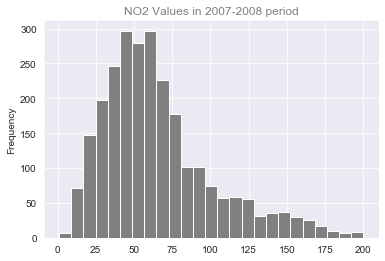

In [17]:
# make a frequency barplot

city_no2_lez.Value.plot.hist(range=(1, 200), bins=25, color='grey')
plt.title('NO2 Values in 2007-2008 period', color = 'grey')
plt.show()

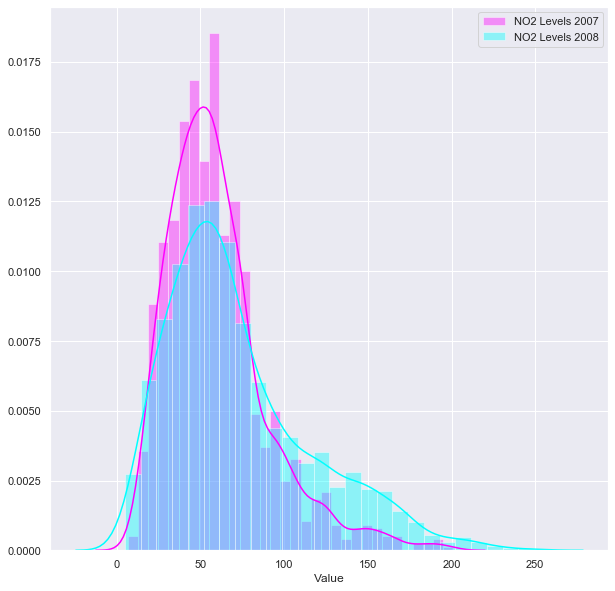

In [18]:
sns.set_color_codes('dark')
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(city_no2_lez.loc[city_no2_lez['Year']==2007]['Value'], color='magenta')
sns.distplot(city_no2_lez.loc[city_no2_lez['Year']==2008]['Value'], color='cyan')
plt.legend(labels=['NO2 Levels 2007', 'NO2 Levels 2008'])

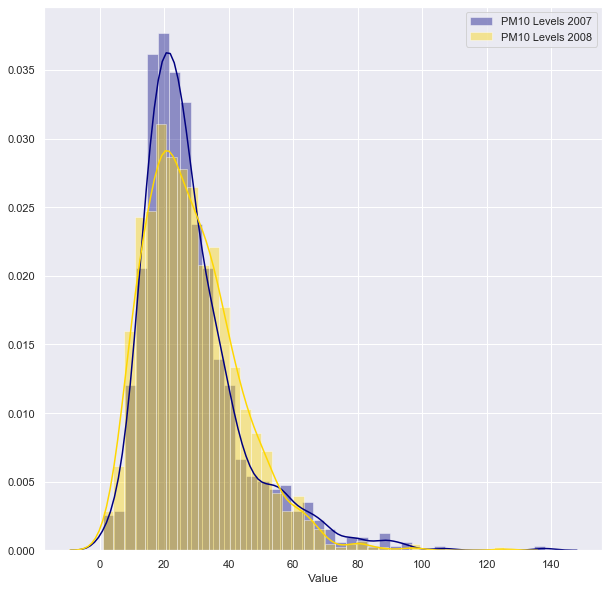

In [19]:
sns.set_color_codes('dark')
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(city_pm10_lez.loc[city_pm10_lez['Year']==2007]['Value'], color='navy')
sns.distplot(city_pm10_lez.loc[city_pm10_lez['Year']==2008]['Value'], color='gold')
plt.legend(labels=['PM10 Levels 2007', 'PM10 Levels 2008'])

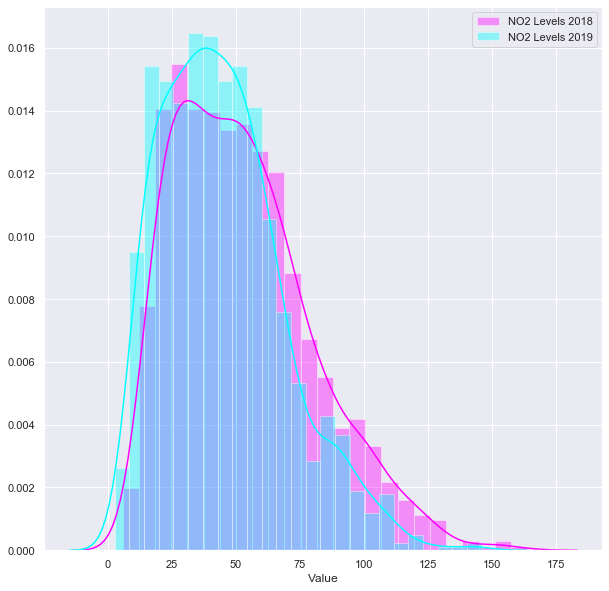

In [20]:
sns.set_color_codes('dark')
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(city_no2_ulez.loc[city_no2_ulez['Year']==2018]['Value'], color='magenta')
sns.distplot(city_no2_ulez.loc[city_no2_ulez['Year']==2019]['Value'], color='cyan')
plt.legend(labels=['NO2 Levels 2018', 'NO2 Levels 2019'])

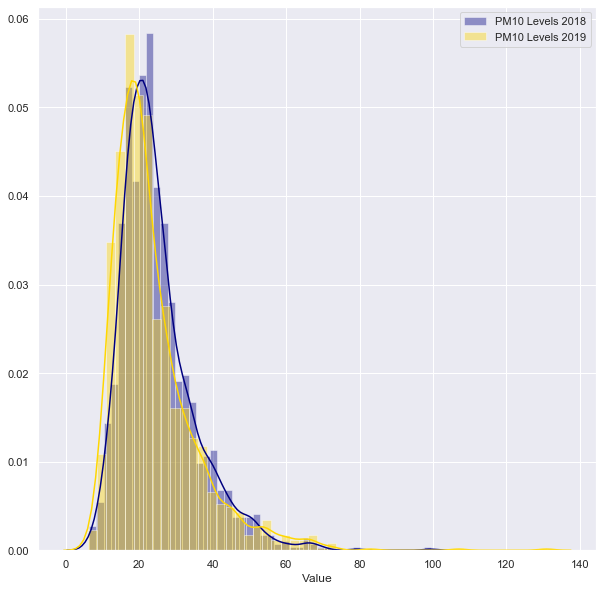

In [21]:
sns.set_color_codes('dark')
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(city_pm10_ulez.loc[city_pm10_ulez['Year']==2018]['Value'], color='navy')
sns.distplot(city_pm10_ulez.loc[city_pm10_ulez['Year']==2019]['Value'], color='gold')
plt.legend(labels=['PM10 Levels 2018', 'PM10 Levels 2019'])

Text(0.5, 1.0, 'NO2 levels in 2019')

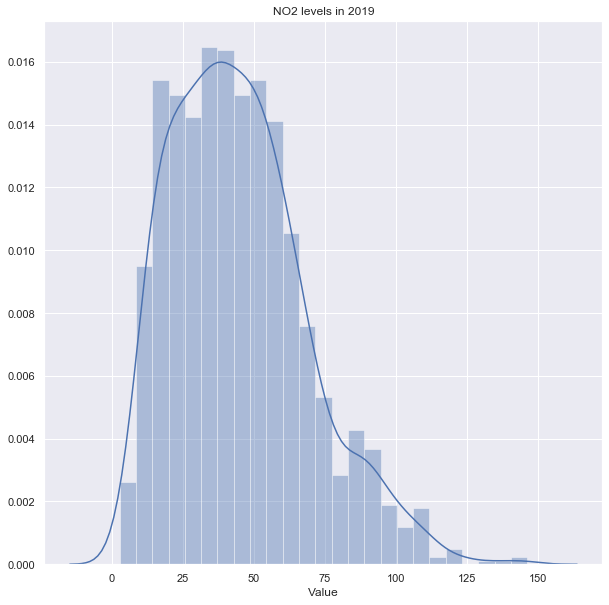

In [22]:
sns.distplot(city_no2_ulez.loc[city_no2_ulez['Year']==2019]['Value'])
plt.title(label='NO2 levels in 2019')

Text(0.5, 1.0, 'PM10 levels in 2019')

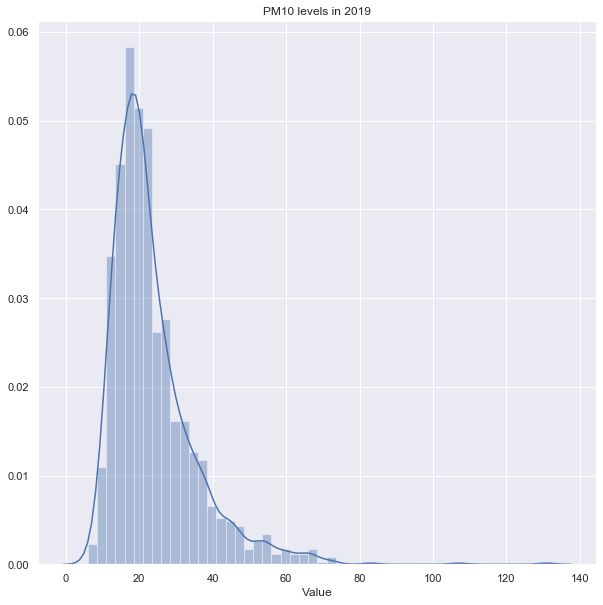

In [23]:
sns.distplot(city_pm10_ulez.loc[city_pm10_ulez['Year']==2019]['Value'])
plt.title(label='PM10 levels in 2019')

At this stage we decided that we had two priorities: 
1. Normalize our testing data before we ran any analysis on it. 
2. Given that ULEZ has only been in effect since April of this current year, and because there might be seasonal effects on the amount of pollutants, we decided to sample from two different months (October and May) for 2018 and 2019 for our comparison groups.

In [24]:
ulez_test_df_no2 = city_no2_ulez.loc[(city_no2_ulez.Month == 5)|(city_no2_ulez.Month == 10)]
ulez_test_df_pm10 = city_pm10_ulez.loc[(city_pm10_ulez.Month == 5)|(city_pm10_ulez.Month == 10)]

ulez_test_df_no2.tail()

,Unnamed: 0,Site,Species,ReadingDateTime,Value,Units,Year,Month
3132,25255,WM6,NO2,2019-10-27,53.3,ug m-3,2019,10
3133,25256,WM6,NO2,2019-10-28,47.5,ug m-3,2019,10
3134,25257,WM6,NO2,2019-10-29,48.7,ug m-3,2019,10
3135,25258,WM6,NO2,2019-10-30,60.3,ug m-3,2019,10
3136,25259,WM6,NO2,2019-10-31,59.4,ug m-3,2019,10


In [25]:
pre_ulez_no2 = ulez_test_df_no2.loc[ulez_test_df_no2['Year']==2018]
post_ulez_no2 = ulez_test_df_no2.loc[ulez_test_df_no2['Year']==2019]

pre_ulez_pm10 = ulez_test_df_pm10.loc[ulez_test_df_pm10['Year']==2018]
post_ulez_pm10 = ulez_test_df_pm10.loc[ulez_test_df_pm10['Year']==2019]

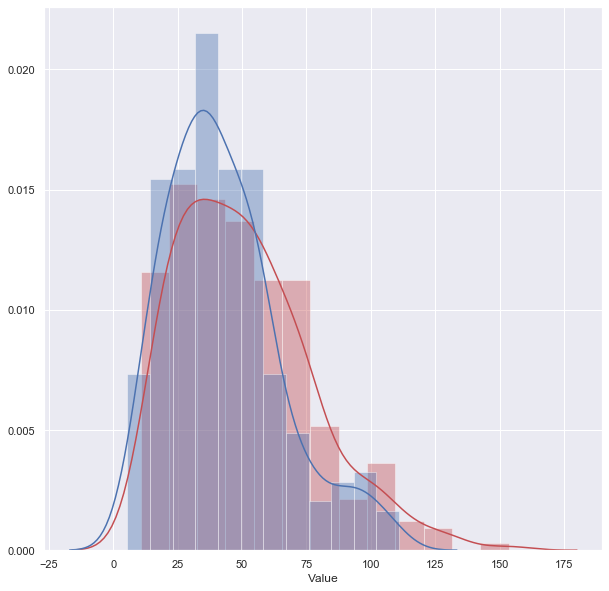

In [26]:
sns.distplot(pre_ulez_no2.Value,color='r')
sns.distplot(post_ulez_no2.Value,color='b')

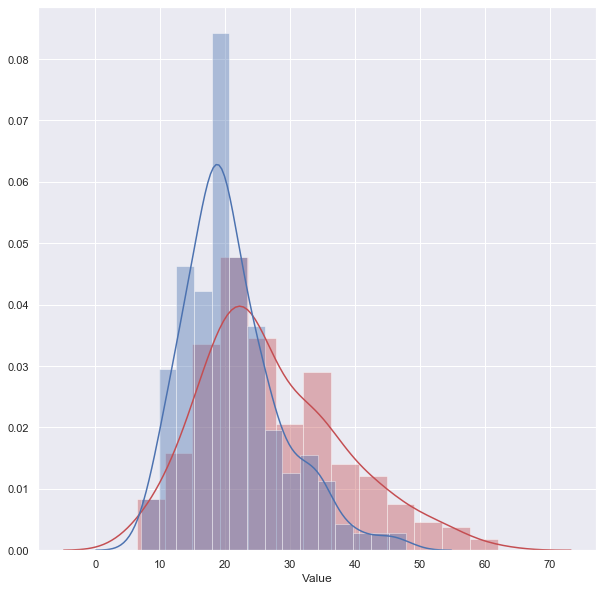

In [27]:
sns.distplot(pre_ulez_pm10.Value,color='r')
sns.distplot(post_ulez_pm10.Value,color='b')

In [28]:
lez_test_df_no2 = city_no2_lez.loc[(city_no2_lez.Month == 5)|(city_no2_lez.Month == 10)]
lez_test_df_pm10 = city_pm10_lez.loc[(city_pm10_lez.Month == 5)|(city_pm10_lez.Month == 10)]


pre_lez_no2 = lez_test_df_no2.loc[lez_test_df_no2['Year']==2007]
post_lez_no2 = lez_test_df_no2.loc[lez_test_df_no2['Year']==2008]

pre_lez_pm10 = lez_test_df_pm10.loc[lez_test_df_pm10['Year']==2007]
post_lez_pm10 = lez_test_df_pm10.loc[lez_test_df_pm10['Year']==2008]

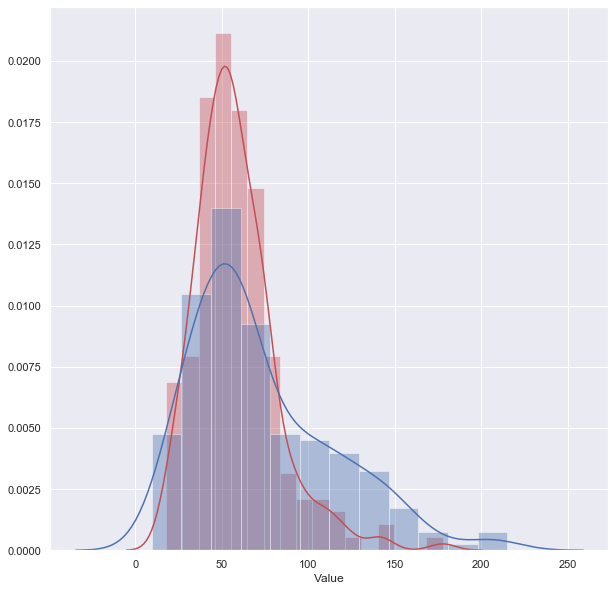

In [29]:
sns.distplot(pre_lez_no2.Value,color='r')
sns.distplot(post_lez_no2.Value,color='b')

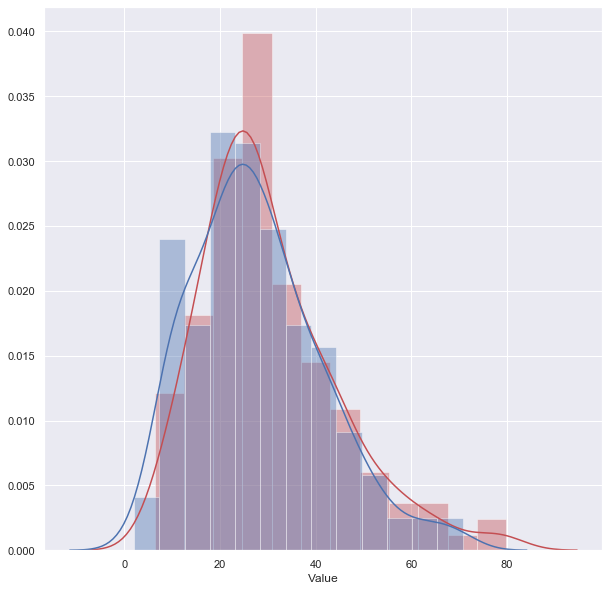

In [30]:
sns.distplot(pre_lez_pm10.Value,color='r')
sns.distplot(post_lez_pm10.Value,color='b')

<a id='stats' ></a>

## 5. Statistical analysis and testing

We normalized our data by taking repeated sampling of the means of the data, which, in line with the Central Limit Theorem, will provide us with a normalized distribution. 

All of our statistical test functions are stored in the hypothesis_tests.py file. Below I've included histograms of the normalized data as our sampling functions generated them.

Given that the sample sizes and variances differed between samples we used a Welch's T-test to compare each pair of samples. We've also plotted the T-distribution and t-statistic for each of the samples further below, after our hypothesis tests. 

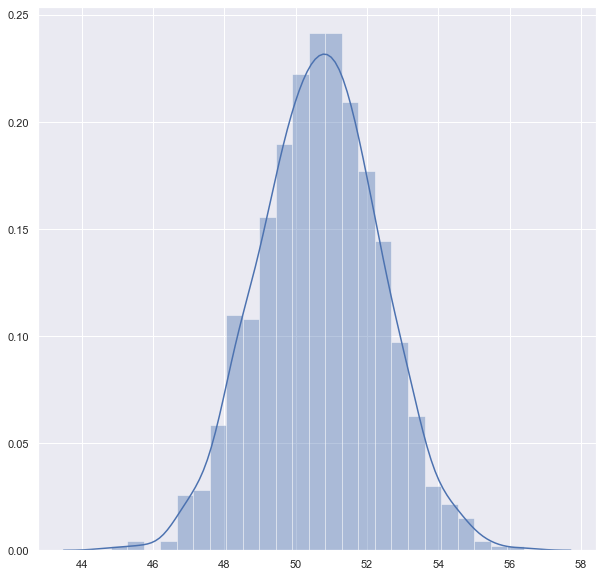

In [31]:
sns.distplot(hyp.create_sample_dists(pre_ulez_no2, 'Value', 1000, 250),bins=25)

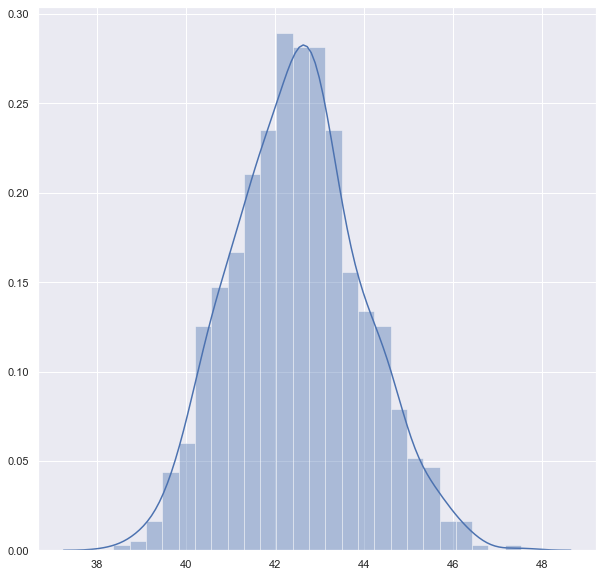

In [32]:
sns.distplot(hyp.create_sample_dists(post_ulez_no2, 'Value', 1000, 250), bins=25)

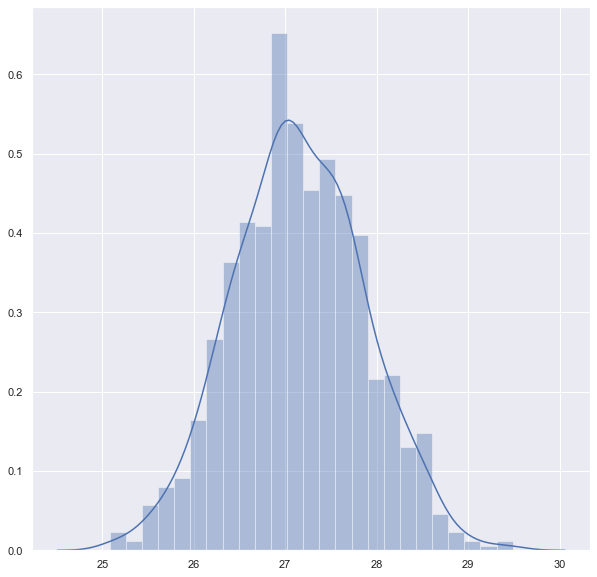

In [33]:
sns.distplot(hyp.create_sample_dists(pre_ulez_pm10, 'Value', 1000, 250), bins=25)

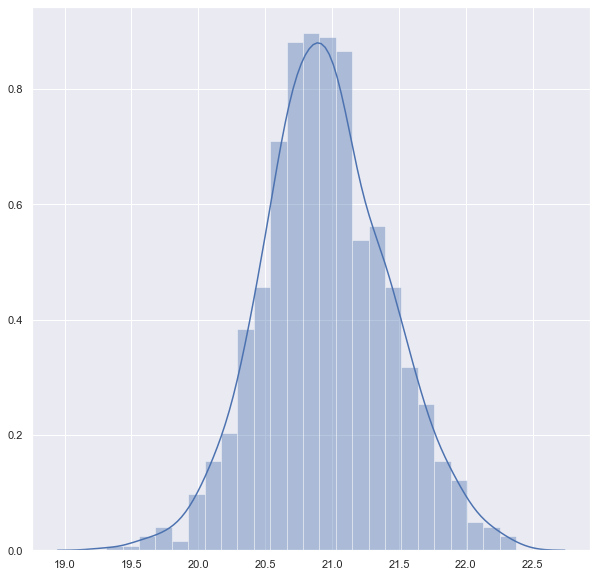

In [34]:
sns.distplot(hyp.create_sample_dists(post_ulez_pm10, 'Value', 1000, 250), bins=25)

Based on the p value of 0.0 and our alpha of 0.05 we reject  the null hypothesis.
 Due to these results, we  can state that there is a difference between our samples 
with an effect size, Cohen's d, of -3.657 and power of 1.0.


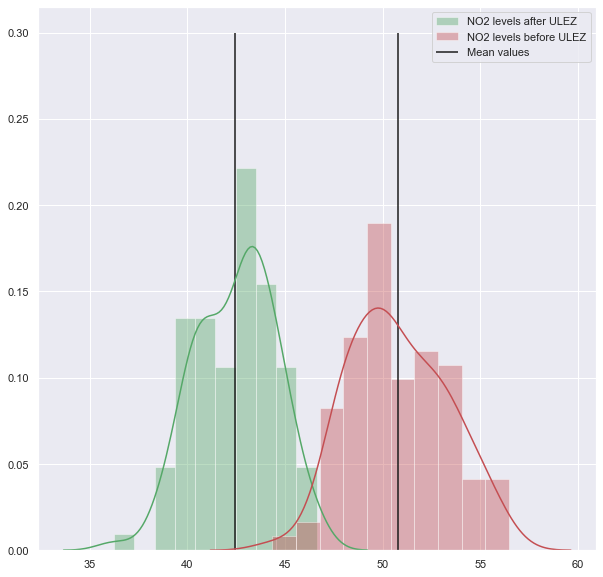

In [36]:

hypothesis_NO2_ULEZ = hyp.hypothesis_test_one(post_ulez_no2, pre_ulez_no2, 
                                              'Value', 100, 100,
                                              sample1_label='NO2 levels after ULEZ',
                                              sample2_label='NO2 levels before ULEZ',
                                              sample1_colour='g', sample2_colour='r',
                                              alpha=0.05)

Based on the p value of 0.0 and our alpha of 0.05 we reject  the null hypothesis.
 Due to these results, we  can state that there is a difference between our samples 
with an effect size, Cohen's d, of -7.025 and power of 1.0.


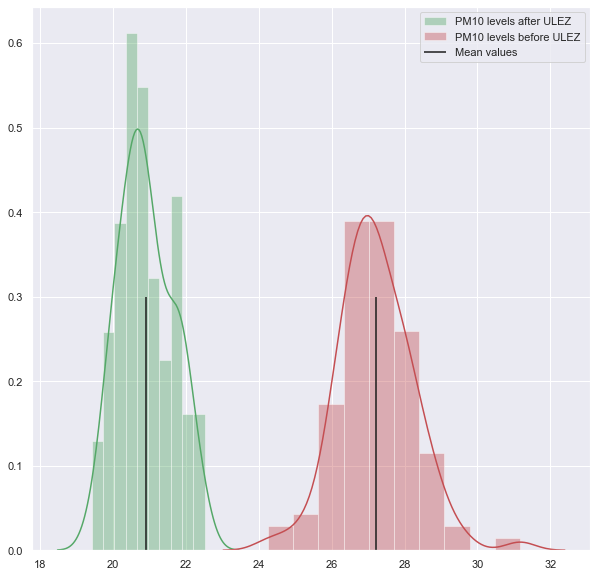

In [37]:
hypotesis_PM10_ULEZ = code_test2 = hyp.hypothesis_test_one(post_ulez_pm10, pre_ulez_pm10, 
                                                           'Value', 100, 100,
                                                           sample1_label='PM10 levels after ULEZ',
                                                           sample2_label='PM10 levels before ULEZ',
                                                           sample1_colour='g', sample2_colour='r',
                                                           alpha=0.05)

Based on the p value of 0.0 and our alpha of 0.05 we reject  the null hypothesis.
 Due to these results, we  can state that there is a difference between our samples 
with an effect size, Cohen's d, of -3.657 and power of 1.0.
Based on the p value of 0.0 and our alpha of 0.05 we reject  the null hypothesis.
 Due to these results, we  can state that there is a difference between our samples 
with an effect size, Cohen's d, of 4.315 and power of 1.0.
Reject 

Reject 



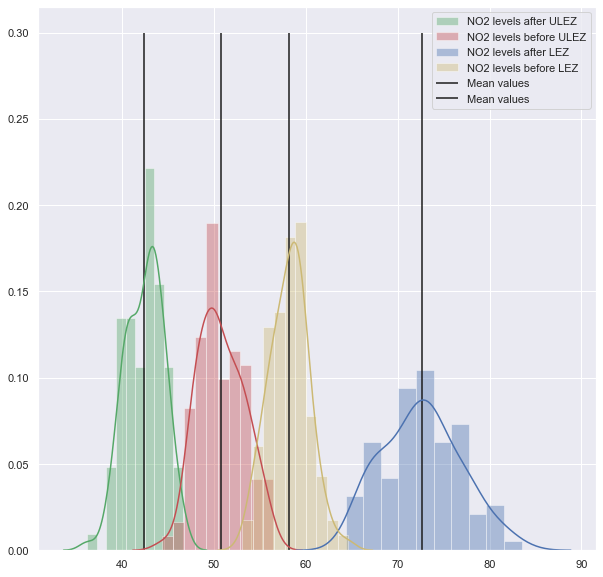

In [38]:

hypothesis_NO2_LEZvsULEZ = hyp.hypothesis_test_two(sample1=post_ulez_no2, sample2=pre_ulez_no2, 
                                                   variable='Value', num_samples=100, sample_size=100, 
                                                   sample1_label='NO2 levels after ULEZ',
                                                   sample2_label='NO2 levels before ULEZ',
                                                   sample1_colour='g', sample2_colour='r',
                                                   first_factor='ULEZ', second_factor='LEZ',
                                                   other_sample1=post_lez_no2, other_sample2=pre_lez_no2,
                                                   other_sample1_label='NO2 levels after LEZ',
                                                   other_sample2_label='NO2 levels before LEZ',
                                                   other_sample1_colour='b', 
                                                   other_sample2_colour='y',
                                                   alpha = 0.05, var_of_interest='NO2')

Based on the p value of 0.0 and our alpha of 0.05 we reject  the null hypothesis.
 Due to these results, we  can state that there is a difference between our samples 
with an effect size, Cohen's d, of -7.025 and power of 1.0.
Based on the p value of 0.0 and our alpha of 0.05 we reject  the null hypothesis.
 Due to these results, we  can state that there is a difference between our samples 
with an effect size, Cohen's d, of -1.921 and power of 1.0.
Reject 

Reject 



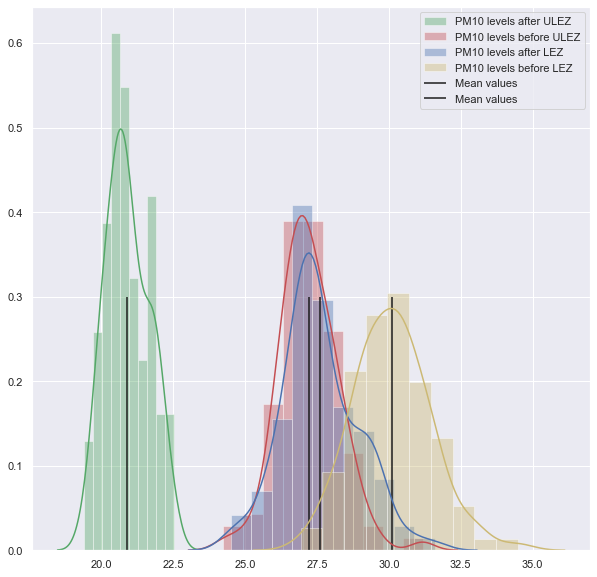

In [40]:
hypothesis_NO2_LEZvsULEZ = hyp.hypothesis_test_two(sample1=post_ulez_pm10, sample2=pre_ulez_pm10, 
                                                   variable='Value', num_samples=100, sample_size=100, 
                                                   sample1_label='PM10 levels after ULEZ',
                                                   sample2_label='PM10 levels before ULEZ',
                                                   sample1_colour='g', sample2_colour='r',
                                                   first_factor='ULEZ', second_factor='LEZ',
                                                   other_sample1=post_lez_pm10, other_sample2=pre_lez_pm10,
                                                   other_sample1_label='PM10 levels after LEZ',
                                                   other_sample2_label='PM10 levels before LEZ',
                                                   other_sample1_colour='b', 
                                                   other_sample2_colour='y',
                                                   alpha = 0.05, var_of_interest='PM10')

In [41]:
sampling_t_stats = [hypothesis_NO2_ULEZ[3],hypotesis_PM10_ULEZ[3]]
sampling_t_dof = [hypothesis_NO2_ULEZ[4],hypotesis_PM10_ULEZ[4]]
test_sample_data = [post_ulez_no2, post_ulez_pm10]
ctrl_sample_data = [pre_ulez_no2, pre_ulez_pm10]

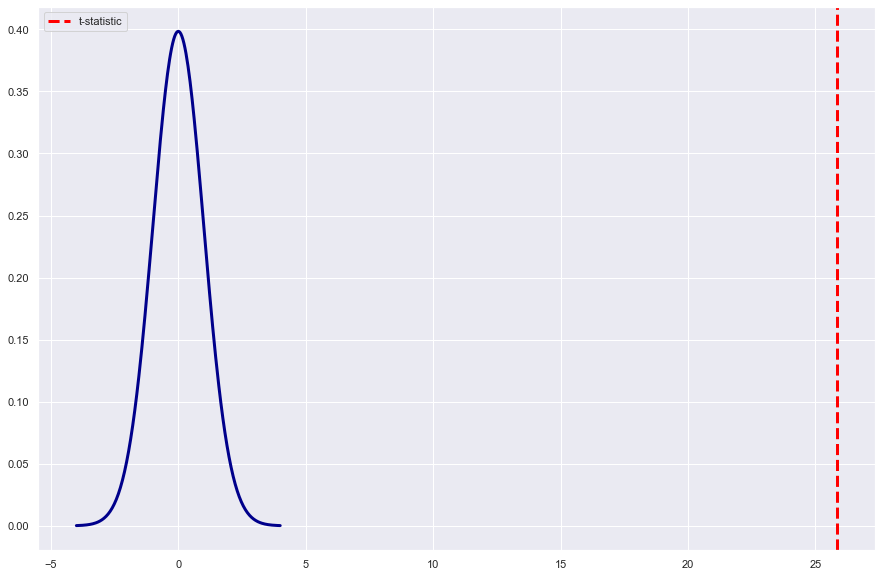

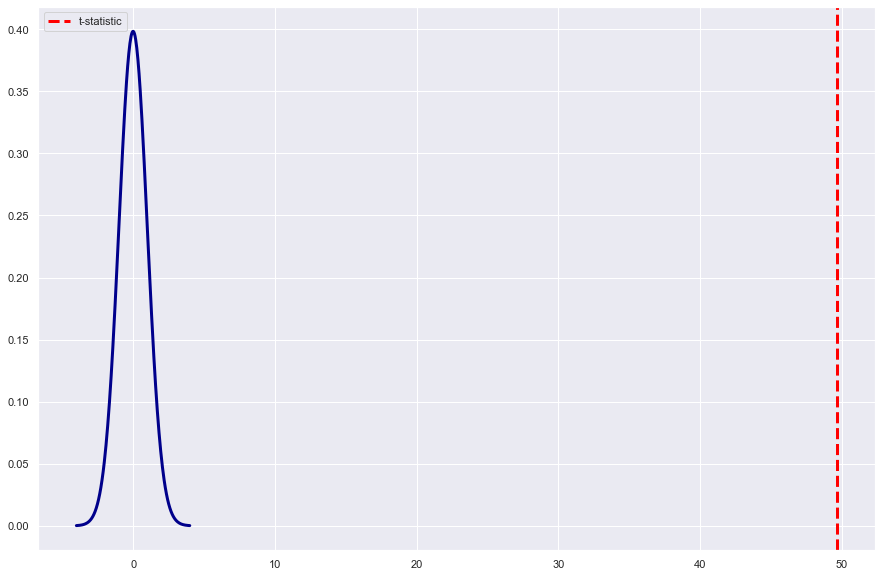

In [42]:
for x in range(len(sampling_t_stats)):
    hyp.visualize_one_side_t(t_stat = sampling_t_stats[x], df = sampling_t_dof[x], 
                             n_experimental = test_sample_data[x],
                             n_control = ctrl_sample_data[x])

<a id='disc' ></a>

## 6. Discussion


Our statistical analysis

